In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('https://storage.googleapis.com/kagglesdsdata/datasets%2F233212%2F497258%2Finsurance.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1596427502&Signature=X1QJo8kQIK1MuyhhOYB2zE%2Buk1kzRU6uMVmJrP6Y0AmLx8znALUsnjYLAec9HeEfBTfwWp%2BmKDO22X3cdL85vDrTyf%2BYuxGGUz933vKt%2F6xuY2Gu2vySZ%2B9rBQMyk7LcEVQRCzvhW7RgZkmq2oQGFBA6NydH1pvkQe4b6Z63iAhaeDDrLWSzEWT0djwWoB3L2topq%2Bt3EpWFmqeTfkBAj3cK1yOzNiHzpK8x8e6v3XBQ3soGWNUZO5eiXy34h1KJVHmd9WpsLcILipgS0TpxseCbthm5tki775fwP5c9m0Dks1tmEH7yjpZXq96GEU8rWvb3To6n%2BBNJzs2Iu1T0nQ%3D%3D')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
#We will clean the data first
# Checking for null values 
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
# Our data looks clean. Let's move on and learn some more details about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


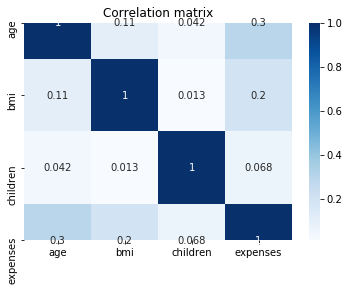

In [7]:
# We will now plot our response variable (expenses) over our regressors and see if we can identify any pattern but
# before that we'll create a heatmap of a correlation matrix and check how our response variable is related to the 
# regressors

corr = df.corr()
plot1 = sns.heatmap(corr, annot = True, cmap='Blues')
plt.title('Correlation matrix')
plot1

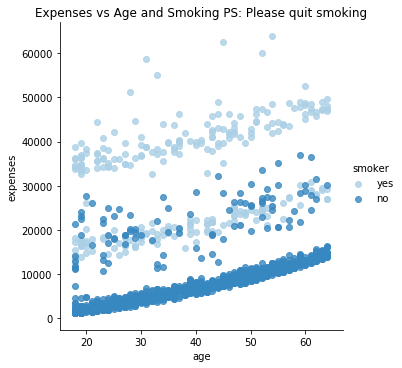

In [8]:
# We will now check how the expenses are varying across different age values
plot2 = sns.lmplot(x='age', y='expenses', hue = 'smoker' , data = df,fit_reg = False, palette = 'Blues')
plt.title('Expenses vs Age and Smoking PS: Please quit smoking')
plot2

In [9]:
# From the graph above we can see that the expenses are definitely high for smokers over non-smokers and there is a
# definite increase in the minimum and maximum expenses as age increases. 

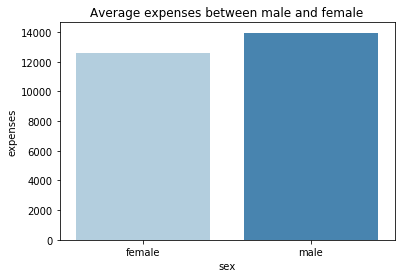

In [10]:
# Differences in average expense between male and female
df_1 = df[['sex','expenses']].groupby(['sex']).mean().reset_index()
plot3 = sns.barplot(x= 'sex',y = 'expenses',data = df_1, palette = 'Blues')
plot3.set_title('Average expenses between male and female')
plot3

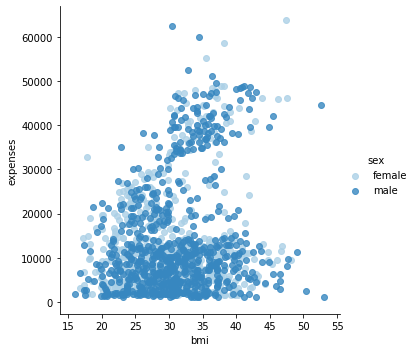

In [11]:
# We can notice a slight difference in the average expenses between male and female. Let's keep a note of that. 
# Now we will check how BMI affects expenses
plot4 = sns.lmplot(x = 'bmi', y = 'expenses',hue = 'sex', data= df, fit_reg = False, palette = 'Blues')

In [12]:
# We can see that there is large portion of values that are high in 30 to 45 age bracket.
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

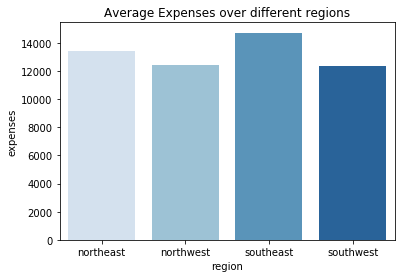

In [13]:
df_2 = df[['region','expenses']].groupby('region').mean().reset_index()
plot5 = sns.barplot(x = 'region', y = 'expenses', data = df_2, palette = 'Blues')
plt.title('Average Expenses over different regions')
plot5

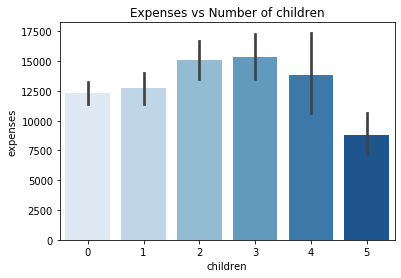

In [14]:
# We can see that southeast has the highest average expense.
plot6 = sns.barplot(x ='children',y = 'expenses', data = df, palette = 'Blues')
plt.title('Expenses vs Number of children')
plot6

In [15]:
df = pd.get_dummies(df, columns = ['sex','smoker'])
df.head()

,age,bmi,children,region,expenses,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.9,0,southwest,16884.92,1,0,0,1
1,18,33.8,1,southeast,1725.55,0,1,1,0
2,28,33.0,3,southeast,4449.46,0,1,1,0
3,33,22.7,0,northwest,21984.47,0,1,1,0
4,32,28.9,0,northwest,3866.86,0,1,1,0


In [16]:
LE = LabelEncoder()
df['region_encoded'] = LE.fit_transform(df['region'])
df.drop('region', axis = 1, inplace = True)

In [17]:
# col= ['age','bmi']
# features = df[col]
# scaler = StandardScaler()
# scaled_mod = scaler.fit(features.values)
# features = scaled_mod.transform(features.values)

In [18]:
# df[col] = features

In [28]:
df.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_encoded
0,19,27.9,0,16884.92,1,0,0,1,3
1,18,33.8,1,1725.55,0,1,1,0,2
2,28,33.0,3,4449.46,0,1,1,0,2
3,33,22.7,0,21984.47,0,1,1,0,1
4,32,28.9,0,3866.86,0,1,1,0,1


In [37]:
LR = LinearRegression()
X = df.drop(['expenses','region_encoded'], axis = 1)
y = df['expenses']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X,y , test_size = 0.5, random_state= 101)

In [39]:
LR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
LR.intercept_

-160.21474021848553

In [41]:
LR.coef_

array([   222.33573518,    367.98373512,    487.86993711,    -99.96635737,
           99.96635737, -11865.6079885 ,  11865.6079885 ])

In [42]:
y_pred = LR.predict(x_test)

In [43]:
MSE = mean_squared_error(y_test, y_pred)
MSE

33059534.346127257

In [44]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

4042.5582311453177